<img style="float: right;" src="files/thehyve_logo.png">
# Examples of interaction with TranSMART RESTful API from Jupyter Notebook
---------------
Copyright (c) 2015 The Hyve B.V. This notebook is licensed under the GNU General Public License, version 3. Authors: Ruslan Forostianov.

## What is Jupyter Notebook

The [Jupyter Notebook](https://jupyter.org/) is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.
The Notebook has support for over 40 programming languages, including those popular in Data Science such as **Ju**lia, **Pyt**hon, **R** and Scala.

## Simple TranSMART API Python Client

See [transmart api client](/edit/transmart_api.py) python module.

### Authorize

In [2]:
import getpass
from transmart_api import TransmartApi

api = TransmartApi(
    host = 'http://localhost:8080',
    user = raw_input('Username:'),
    password = getpass.getpass('Password:'))

api.access()

Username:admin
Password:········


'SUCCESS'

### Fetch some clinical data

In [3]:
obs = api.get_observations(study = 'GSE8581')
obs[0:3]

[{u'label': u'\\Public Studies\\GSE8581\\Biomarker Data\\GPL570\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'sex': u'FEMALE',
   u'trial': u'GSE8581'},
  u'value': None},
 {u'label': u'\\Public Studies\\GSE8581\\Endpoints\\Diagnosis\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'sex': u'FEMALE',
   u'trial': u'GSE8581'},
  u'value': u'non-small cell adenocarcinoma'},
 {u'label': u'\\Public Studies\\GSE8581\\Endpoints\\FEV1\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'se

### Fetch some high dimensonal data

The api returns data serialized with [Google Protocol Buffers](https://developers.google.com/protocol-buffers/). To deserialize binary stream it's important to have a protobuf definition file for the data structure. See [it](/edit/highdim.proto).

In [4]:
(hdHeader, hdRows) = api.get_hd_node_data(study = 'GSE8581',
                                          node_name = 'Lung',
                                          projection='default_real_projection',
                                          genes = ['TP53', 'AURKA'])

In [5]:
hdHeader

In [6]:
hdRows[0:5]

In [7]:
#type:
#1 - double
#2 - string
[(x.name, x.type) for x in hdHeader.columnSpec]

[(u'value', 1)]

In [8]:
hdDataDic = {row.label: row.value[0].doubleValue for row in hdRows}

## Pandas

### Change the clinical data shape

In [9]:
import pandas
from pandas.io.json import json_normalize
obs_df1 = json_normalize(obs)
obs_df1[0:3]

,label,subject.age,subject.birthDate,subject.deathDate,subject.id,subject.inTrialId,subject.maritalStatus,subject.race,subject.religion,subject.sex,subject.trial,value
0,\Public Studies\GSE8581\Biomarker Data\GPL570\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,None
1,\Public Studies\GSE8581\Endpoints\Diagnosis\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,non-small cell adenocarcinoma
2,\Public Studies\GSE8581\Endpoints\FEV1\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,1.41


In [10]:
obs_df2 = obs_df1.pivot(index = 'subject.inTrialId', columns = 'label', values = 'value')
obs_df2[0:3]

label,\Public Studies\GSE8581\Biomarker Data\GPL570\,\Public Studies\GSE8581\Endpoints\Diagnosis\,\Public Studies\GSE8581\Endpoints\FEV1\,\Public Studies\GSE8581\Endpoints\Forced Expiratory Volume Ratio\,\Public Studies\GSE8581\Subjects\Age\,\Public Studies\GSE8581\Subjects\Height (inch)\,\Public Studies\GSE8581\Subjects\Lung Disease\,\Public Studies\GSE8581\Subjects\Organism\,\Public Studies\GSE8581\Subjects\Race\,\Public Studies\GSE8581\Subjects\Sex\
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210005,None,non-small cell adenocarcinoma,1.69,83.66,84,60,control,Homo sapiens,Afro American,female
GSE8581GSM210006,None,non-small cell adenocarcinoma,1.41,51,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female


In [11]:
obs_df2.dtypes

label
\Public Studies\GSE8581\Biomarker Data\GPL570\                       object
\Public Studies\GSE8581\Endpoints\Diagnosis\                         object
\Public Studies\GSE8581\Endpoints\FEV1\                              object
\Public Studies\GSE8581\Endpoints\Forced Expiratory Volume Ratio\    object
\Public Studies\GSE8581\Subjects\Age\                                object
\Public Studies\GSE8581\Subjects\Height (inch)\                      object
\Public Studies\GSE8581\Subjects\Lung Disease\                       object
\Public Studies\GSE8581\Subjects\Organism\                           object
\Public Studies\GSE8581\Subjects\Race\                               object
\Public Studies\GSE8581\Subjects\Sex\                                object
dtype: object

In [12]:
#to make pandas guess data types of the columns
obs_df3 = obs_df2.convert_objects()
obs_df3.dtypes

label
\Public Studies\GSE8581\Biomarker Data\GPL570\                        object
\Public Studies\GSE8581\Endpoints\Diagnosis\                          object
\Public Studies\GSE8581\Endpoints\FEV1\                              float64
\Public Studies\GSE8581\Endpoints\Forced Expiratory Volume Ratio\    float64
\Public Studies\GSE8581\Subjects\Age\                                float64
\Public Studies\GSE8581\Subjects\Height (inch)\                      float64
\Public Studies\GSE8581\Subjects\Lung Disease\                        object
\Public Studies\GSE8581\Subjects\Organism\                            object
\Public Studies\GSE8581\Subjects\Race\                                object
\Public Studies\GSE8581\Subjects\Sex\                                 object
dtype: object

In [13]:
obs_df4 = obs_df3.rename(
    columns = lambda c: c.replace('\Public Studies\GSE8581\\', '')[:-1],
    inplace = False)
obs_df4[0:3]

label,Biomarker Data\GPL570,Endpoints\Diagnosis,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch),Subjects\Lung Disease,Subjects\Organism,Subjects\Race,Subjects\Sex
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58.00,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210005,None,non-small cell adenocarcinoma,1.69,83.66,84,60,control,Homo sapiens,Afro American,female
GSE8581GSM210006,None,non-small cell adenocarcinoma,1.41,51.00,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female


### Change the shape of HD data

In [14]:
from pandas import DataFrame
hdDataDic['patientId'] = [assay.patientId for assay in hdHeader.assay]
assayIds = [assay.assayId for assay in hdHeader.assay]
hd_df = DataFrame(data=hdDataDic, index = assayIds)
hd_df[0:10]

,201746_at,204092_s_at,208079_s_at,208080_at,211300_s_at,patientId
45741,45.25530,61.428400,53.77660,1.08084,31.6424,GSE8581GSM213034
45742,61.31550,42.516700,34.59850,2.42510,13.8971,GSE8581GSM212811
45743,56.84860,29.488600,26.76440,2.79179,17.3414,GSE8581GSM213036
45744,88.71880,44.719800,39.41060,1.94118,24.0898,GSE8581GSM212075
45745,57.22760,25.578800,33.30950,5.15415,33.0352,GSE8581GSM211008
45746,77.81250,25.868200,27.15200,9.03928,50.2931,GSE8581GSM210090
45747,32.36190,24.203600,18.65140,4.20431,19.9424,GSE8581GSM212855
45748,105.82100,35.938300,47.17160,2.29847,67.8302,GSE8581GSM212070
45749,6.98541,0.362184,2.11288,0.97270,4.2149,GSE8581GSM212810
45750,82.68780,37.258200,28.35180,3.19601,34.2873,GSE8581GSM210193


### Select subgroups

In [15]:
males_abv_50 = (obs_df4['Subjects\Age'] > 50) & (obs_df4['Subjects\Sex'] == 'male')
males_abv_50[0:10]

subject.inTrialId
GSE8581GSM210004     True
GSE8581GSM210005    False
GSE8581GSM210006    False
GSE8581GSM210007    False
GSE8581GSM210008    False
GSE8581GSM210009    False
GSE8581GSM210010    False
GSE8581GSM210011     True
GSE8581GSM210012     True
GSE8581GSM210014    False
dtype: bool

In [16]:
obs_df4[males_abv_50][0:3]

label,Biomarker Data\GPL570,Endpoints\Diagnosis,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch),Subjects\Lung Disease,Subjects\Organism,Subjects\Race,Subjects\Sex
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58.00,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210011,E,non-small cell squamous cell carcinoma,1.87,56.00,56,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210012,E,non-small cell adenocarcinoma,2.76,70.58,61,69,not specified,Homo sapiens,Caucasian,male


### Join data

See pandas [documentation on how to merge](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [17]:
hd_df.join(obs_df4, on='patientId')[0:3]

,201746_at,204092_s_at,208079_s_at,208080_at,211300_s_at,patientId,Biomarker Data\GPL570,Endpoints\Diagnosis,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch),Subjects\Lung Disease,Subjects\Organism,Subjects\Race,Subjects\Sex
45741,45.2553,61.4284,53.7766,1.08084,31.6424,GSE8581GSM213034,E,non-small cell adenocarcinoma,2.56,61,70,69,not specified,Homo sapiens,Caucasian,male
45742,61.3155,42.5167,34.5985,2.42510,13.8971,GSE8581GSM212811,E,non-small cell squamous cell carcinoma,1.37,82,77,58,control,Homo sapiens,Caucasian,female
45743,56.8486,29.4886,26.7644,2.79179,17.3414,GSE8581GSM213036,E,non-small cell squamous cell carcinoma,2.68,71,59,69,control,Homo sapiens,Caucasian,female


## Interaction with R

The Notebook gives possibility to interact with R environunment easily. You need just to mark a cell with so called [magic notation](https://ipython.org/ipython-doc/2/config/extensions/rmagic.html).

In [19]:
%load_ext rpy2.ipython

In [20]:
%%R -i obs_df4
str(obs_df4)

'data.frame':	58 obs. of  10 variables:
 $ Biomarker.Data.GPL570                   : Factor w/ 2 levels "E","None": 2 2 2 1 1 1 1 1 1 1 ...
 $ Endpoints.Diagnosis                     : Factor w/ 14 levels "carcinoid","emphysema",..: 12 11 11 11 11 12 11 12 11 11 ...
 $ Endpoints.FEV1                          : num [1:58(1d)] 2.54 1.69 1.41 2.51 1.64 2.72 1.45 1.87 2.76 1.98 ...
 $ Endpoints.Forced.Expiratory.Volume.Ratio: num [1:58(1d)] 58 83.7 51 81 57 ...
 $ Subjects.Age                            : num [1:58(1d)] 63 84 65 46 53 53 77 56 61 71 ...
 $ Subjects.Height..inch.                  : num [1:58(1d)] 72 60 66 66 65 64 63 72 69 63 ...
 $ Subjects.Lung.Disease                   : Factor w/ 3 levels "chronic obstructive pulmonary disease",..: 1 2 1 3 1 2 3 1 3 2 ...
 $ Subjects.Organism                       : Factor w/ 1 level "Homo sapiens": 1 1 1 1 1 1 1 1 1 1 ...
 $ Subjects.Race                           : Factor w/ 2 levels "Afro American",..: 2 1 1 2 2 2 2 2 2 2 ...
 $ Subj

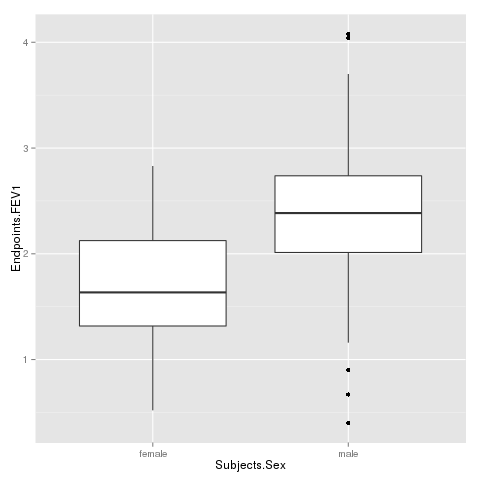

In [21]:
%%R -i obs_df4
library(ggplot2)

ggplot(obs_df4, aes(x = Subjects.Sex, y = Endpoints.FEV1)) + geom_boxplot()

In [22]:
%%R -i obs_df4 -o tmodel

tmodel <- t.test(obs_df4$Endpoints.FEV1~obs_df4$Subjects.Sex)
tmodel


	Welch Two Sample t-test

data:  obs_df4$Endpoints.FEV1 by obs_df4$Subjects.Sex
t = -3.2644, df = 45.884, p-value = 0.002077
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1037123 -0.2617163
sample estimates:
mean in group female   mean in group male 
            1.703000             2.385714 



In [23]:
tmodel[3]

<FloatVector - Python:0x7f1241a84758 / R:0x5f55dd8>
[-1.103712, -0.261716]

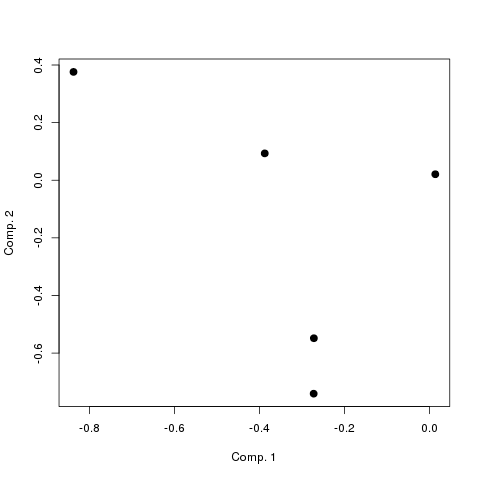

In [30]:
%%R -i hd_df
library(dplyr)

pc <- princomp(select(hd_df, -patientId))$loadings[, 1:2]
plot(pc[, 1], pc[, 2], pch = 19, xlab = "Comp. 1", ylab = "Comp. 2", main = "", cex = 1.3)

## Widgets

In [31]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def f(x):
    return x

interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10

In [26]:
concepts = api.get_concepts('GSE8581', hal = True)

In [27]:
import ipywidgets as widgets
from IPython.display import display

d = widgets.Dropdown()
d.options = [c['name'] for c in concepts['_embedded']['ontology_terms'] if c['type'] == 'NUMERIC']
def f(prop, val):
    print val
d.on_trait_change(f, 'value')
display(d)

Forced Expiratory Volume Ratio
FEV1
Height (inch)
